## Statistics Practical Implementation ðŸ“‰

### Measure Of Central Tendency

1. Mean
2. Median
3. Mode

In [1]:
ages=[23,24,32,45,12,43,67,45,32,56,32,120]

### Import

In [2]:
import numpy as np
import statistics

### mean
Used when outlier is no there , other wise it is affected by outliers

In [3]:
print(np.mean(ages))

44.25


In [4]:
print(statistics.mean(ages))

44.25


### Median
To deal with outliers

In [5]:
print(np.median(ages))

37.5


In [6]:
print(statistics.median(ages))

37.5


### Mode
Used when to identify a category to fill the data in as it uses frequency.

In [7]:
statistics.mode(ages)

32

## Boxplot

<Axes: >

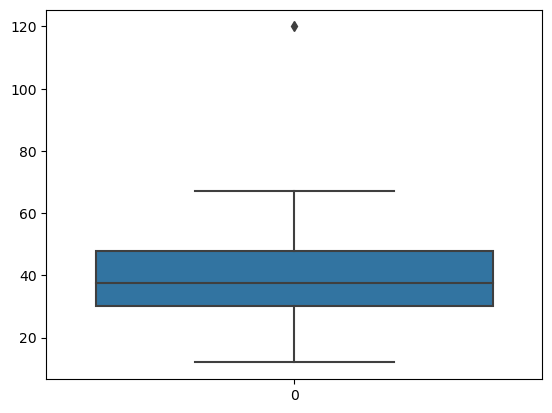

In [8]:
import seaborn as sns
sns.boxplot(ages)

## Number Summary

In [9]:
import numpy as np

In [10]:
q1,q3=np.percentile(ages,[25,75])

In [11]:
print(q1,q3)

30.0 47.75


## Let's check outlier[Lower Fence- Higher fence]

In [12]:
IQR=q3-q1
lower_fence=q1-1.5*(IQR)
higher_fence=q3+1.5*(IQR)
print(lower_fence,higher_fence)

3.375 74.375


N.B : so in this range (3.375 , 74.375) all values are good to consider , value exceed the range means outlier eg. 120 

## Measure Of Dispersion

1. Variance
2. Standard Deviation

sample variance

In [13]:
statistics.variance(ages)

795.2954545454545

population variance

In [14]:
statistics.pvariance(ages)

729.0208333333334

In [15]:
np.var(ages,axis=0)

729.0208333333334

 Both gives different variance as `statistics.variance` calculates `sample variance` and `np.var` calculates `population variance`

#### Manually calculate variance

In [16]:
def variance(data):
    n=len(ages)
  ## mean of the data
    mean=sum(data)/n
  ## variance
    deviation=[(x - mean) ** 2 for x in data]
    variance=sum(deviation)/(n-1)
    return variance

In [17]:
variance(ages)

795.2954545454545

In [18]:
def variance(data,dof=0):
    n=len(ages)
    ## mean of the data
    mean=sum(data)/n
    ## variance
    deviation=[(x - mean) ** 2 for x in data]
    variance=sum(deviation)/(n-dof)
    return variance

In [19]:
variance(ages,dof=1)

795.2954545454545

## Standard Deviation

In [20]:
import math
math.sqrt(statistics.pvariance(ages))

27.000385799712813

## Histograms And PDF

<Axes: ylabel='Count'>

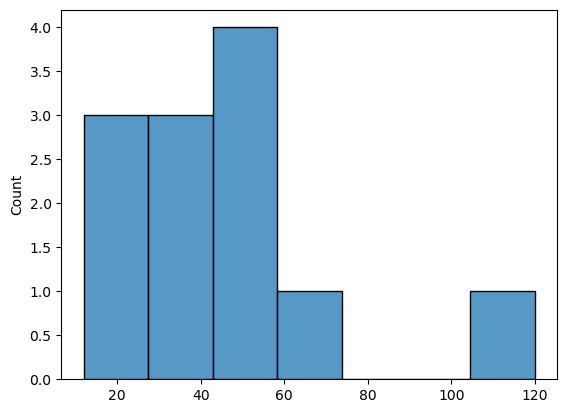

In [21]:
import seaborn as sns
sns.histplot(ages)

<Axes: ylabel='Count'>

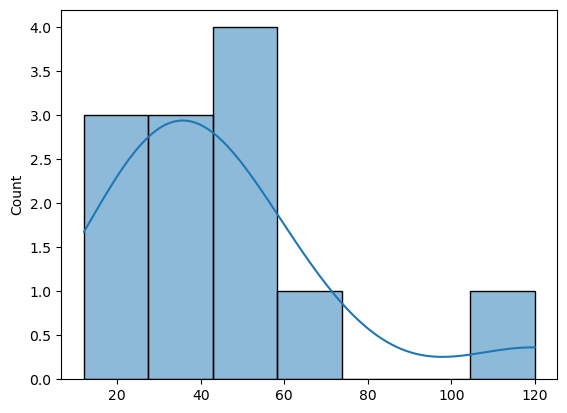

In [22]:
### Kernel density estimater
### PDF

sns.histplot(ages,kde=True)

### On iris dataset

In [23]:
df=sns.load_dataset('iris')

In [24]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

<Axes: xlabel='sepal_length', ylabel='Count'>

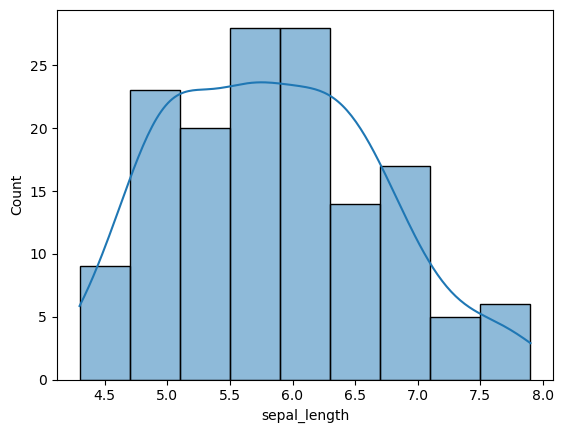

In [25]:
sns.histplot(df['sepal_length'],kde=True)

#### Gaussian / Normal distribution

<Axes: xlabel='sepal_width', ylabel='Count'>

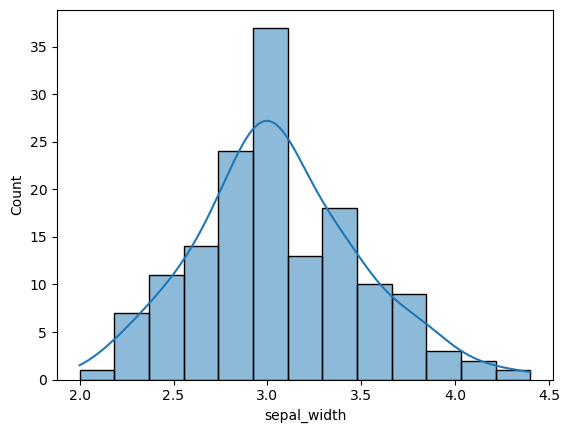

In [26]:
sns.histplot(df['sepal_width'],kde=True)

<Axes: xlabel='petal_length', ylabel='Count'>

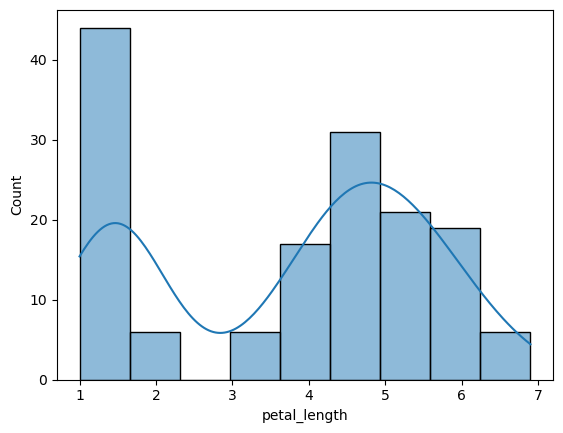

In [27]:
sns.histplot(df['petal_length'],kde=True)

<Axes: xlabel='petal_width', ylabel='Count'>

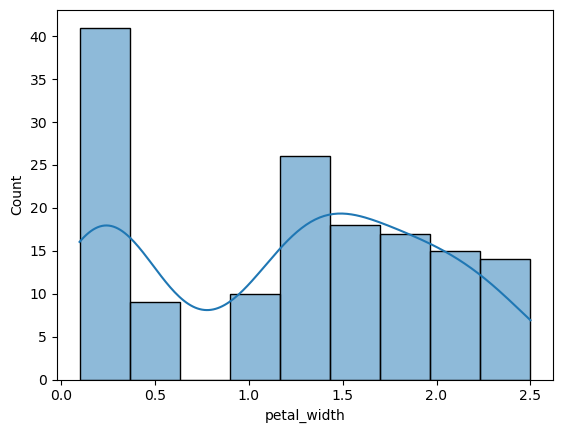

In [28]:
sns.histplot(df['petal_width'],kde=True)

#### create a normal distributed data


In [29]:
s=np.random.normal(0.5,0.2,1000)

In [30]:
s

array([ 0.23827335,  0.66056163,  0.74232696,  0.67319033,  0.34861719,
        0.69317885,  0.4640027 ,  0.61998003,  0.39971382, -0.02008048,
        0.73698106,  0.7069826 ,  0.65277738,  0.57237388,  0.4941129 ,
        0.20523609,  0.6693801 ,  0.50723335,  0.03873224,  0.55544328,
        0.10115847,  0.21585706,  0.71136682,  0.31560936,  0.38112931,
        0.4660875 ,  0.8262286 ,  0.45849306,  0.11901987,  0.14864948,
        0.4890154 ,  0.13882865,  0.87670093,  0.69774077,  0.45753076,
        0.59410748,  0.71284481,  0.20370898,  0.70687184,  0.70422663,
        0.57575278,  0.10083459,  0.67955481,  0.40232361,  0.83712288,
        0.44339371,  0.52462406,  0.44518916,  0.63195295,  0.43510361,
        0.84923669,  0.73138692,  0.80533195,  0.40142403,  0.29800992,
        0.53245766,  0.50105298,  0.9234668 ,  0.38965621,  0.3913594 ,
       -0.12851213,  0.72180242,  0.55340292,  0.81479094,  0.22411046,
        0.59966365,  0.64849896,  0.61766732,  0.23334581,  0.49

<Axes: ylabel='Count'>

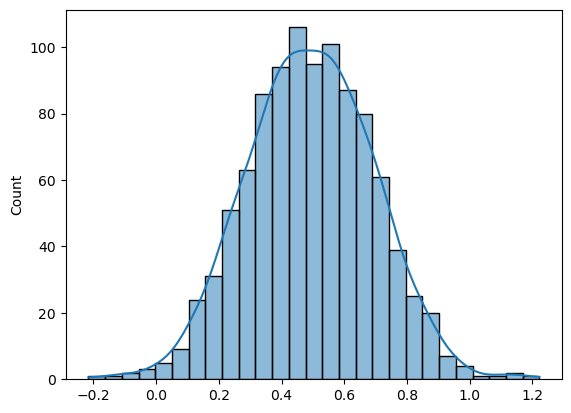

In [31]:
sns.histplot(s,kde=True)

## Other Distribuiton
## Log Normal Distribution,Power Law Distribution

In [32]:
mu, sigma = 3., 1. # mean and standard deviation
s = np.random.lognormal(mu, sigma, 1000)

<Axes: ylabel='Count'>

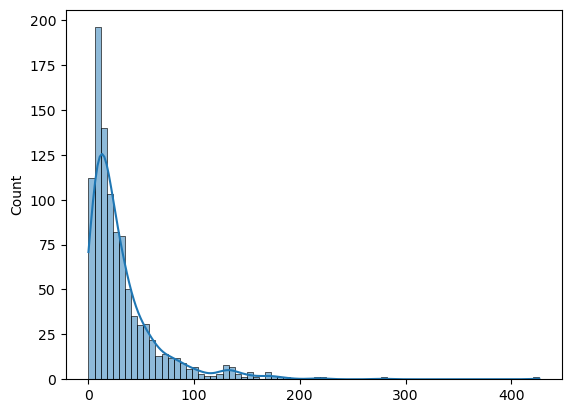

In [33]:
sns.histplot(s,kde=True)

When applied log we get Normal distribution

<Axes: ylabel='Count'>

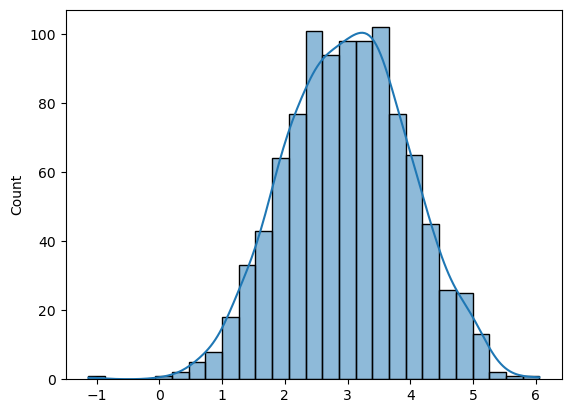

In [34]:
sns.histplot(np.log(s),kde=True)

## Check whether Disstribution is Normal Distribution

#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot

In [35]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
def plot_data(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(sample,dist='norm',plot=pylab)
    plt.show()

### create a normal distributed data

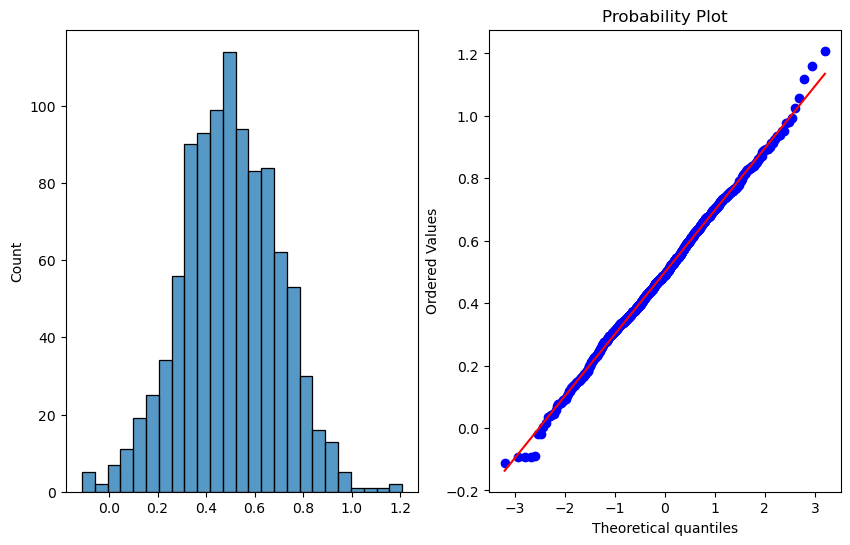

In [36]:
s=np.random.normal(0.5,0.2,1000)
plot_data(s)

### Check with `sepal_width`

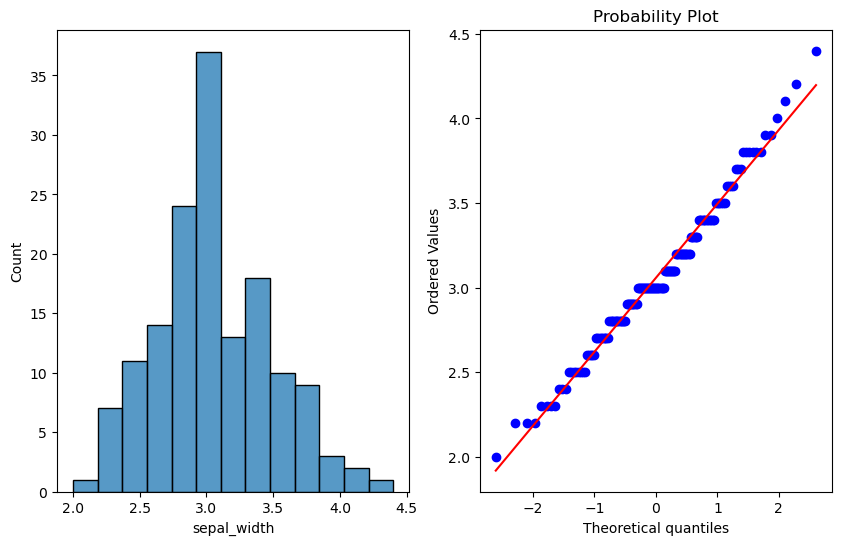

In [37]:
plot_data(df['sepal_width'])

### Check Log normal distribution

In [38]:
mu, sigma = 3., 1. # mean and standard deviation
sample = np.random.lognormal(mu, sigma, 100)

In [39]:
def plot_data_log(sample):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(sample)
    plt.subplot(1,2,2)
    stat.probplot(np.log(sample),dist='norm',plot=pylab)
    plt.show()

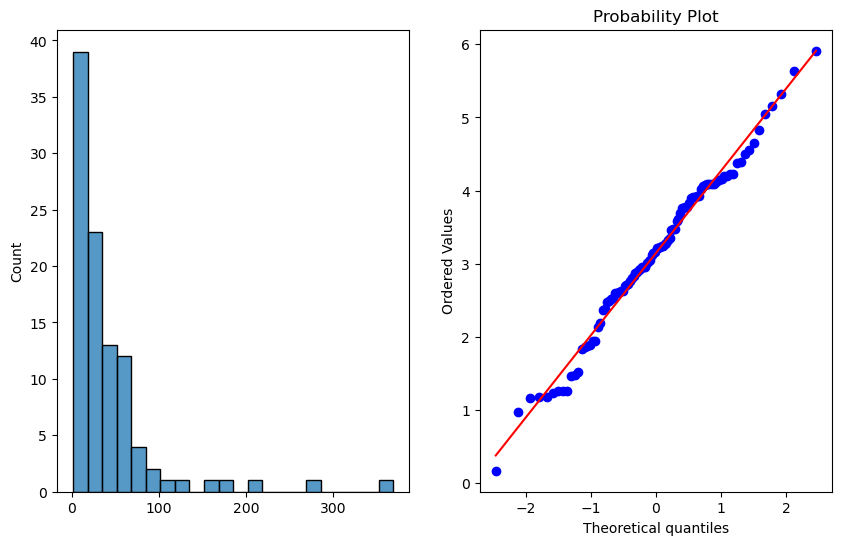

In [40]:
plot_data_log(sample)

## Pearson and Sperman Rank Correlation

In [41]:
df=sns.load_dataset('tips')

In [42]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [43]:
import pandas as pd

In [44]:
df_numeric = pd.get_dummies(df)

In [45]:
correlation_matrix = df_numeric.corr()
correlation_matrix

total_bill       tip      size  sex_Male  sex_Female  smoker_Yes  \
total_bill     1.000000  0.675734  0.598315  0.144877   -0.144877    0.085721   
tip            0.675734  1.000000  0.489299  0.088862   -0.088862    0.005929   
size           0.598315  0.489299  1.000000  0.086195   -0.086195   -0.133178   
sex_Male       0.144877  0.088862  0.086195  1.000000   -1.000000    0.002816   
sex_Female    -0.144877 -0.088862 -0.086195 -1.000000    1.000000   -0.002816   
smoker_Yes     0.085721  0.005929 -0.133178  0.002816   -0.002816    1.000000   
smoker_No     -0.085721 -0.005929  0.133178 -0.002816    0.002816   -1.000000   
day_Thur      -0.138174 -0.095879 -0.072598 -0.194445    0.194445   -0.128534   
day_Fri       -0.086168 -0.055463 -0.142184 -0.071060    0.071060    0.244316   
day_Sat        0.054919 -0.002790 -0.041121  0.053957   -0.053957    0.155744   
day_Sun        0.122953  0.125114  0.193054  0.168106   -0.168106   -0.181624   
time_Lunch    -0.183118 -0.121629 -0.103411 -0.205231    0.205231   -0.054921   
time_Dinner    0.183118  0.121629  0.103411  0.205231   -0.205231    0.054921   

             smoker_No  day_Thur   day_Fri   day_Sat   day_Sun  time_Lunch  \
total_bill   -0.085721 -0.138174 -0.086168  0.054919  0.122953   -0.183118   
tip          -0.005929 -0.095879 -0.055463 -0.002790  0.125114   -0.121629   
size          0.133178 -0.072598 -0.142184 -0.041121  0.193054   -0.103411   
sex_Male     -0.002816 -0.194445 -0.071060  0.053957  0.168106   -0.205231   
sex_Female    0.002816  0.194445  0.071060 -0.053957 -0.168106    0.205231   
smoker_Yes   -1.000000 -0.128534  0.244316  0.155744 -0.181624   -0.054921   
smoker_No     1.000000  0.128534 -0.244316 -0.155744  0.181624    0.054921   
day_Thur      0.128534  1.000000 -0.169608 -0.434480 -0.392566    0.917996   
day_Fri      -0.244316 -0.169608  1.000000 -0.216319 -0.195451    0.058159   
day_Sat      -0.155744 -0.434480 -0.216319  1.000000 -0.500682   -0.462709   
day_Sun       0.181624 -0.392566 -0.195451 -0.500682  1.000000   -0.418071   
time_Lunch    0.054921  0.917996  0.058159 -0.462709 -0.418071    1.000000   
time_Dinner  -0.054921 -0.917996 -0.058159  0.462709  0.418071   -1.000000   

             time_Dinner  
total_bill      0.183118  
tip             0.121629  
size            0.103411  
sex_Male        0.205231  
sex_Female     -0.205231  
smoker_Yes      0.054921  
smoker_No      -0.054921  
day_Thur       -0.917996  
day_Fri        -0.058159  
day_Sat         0.462709  
day_Sun         0.418071  
time_Lunch     -1.000000  
time_Dinner     1.000000

C:\Users\udaya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


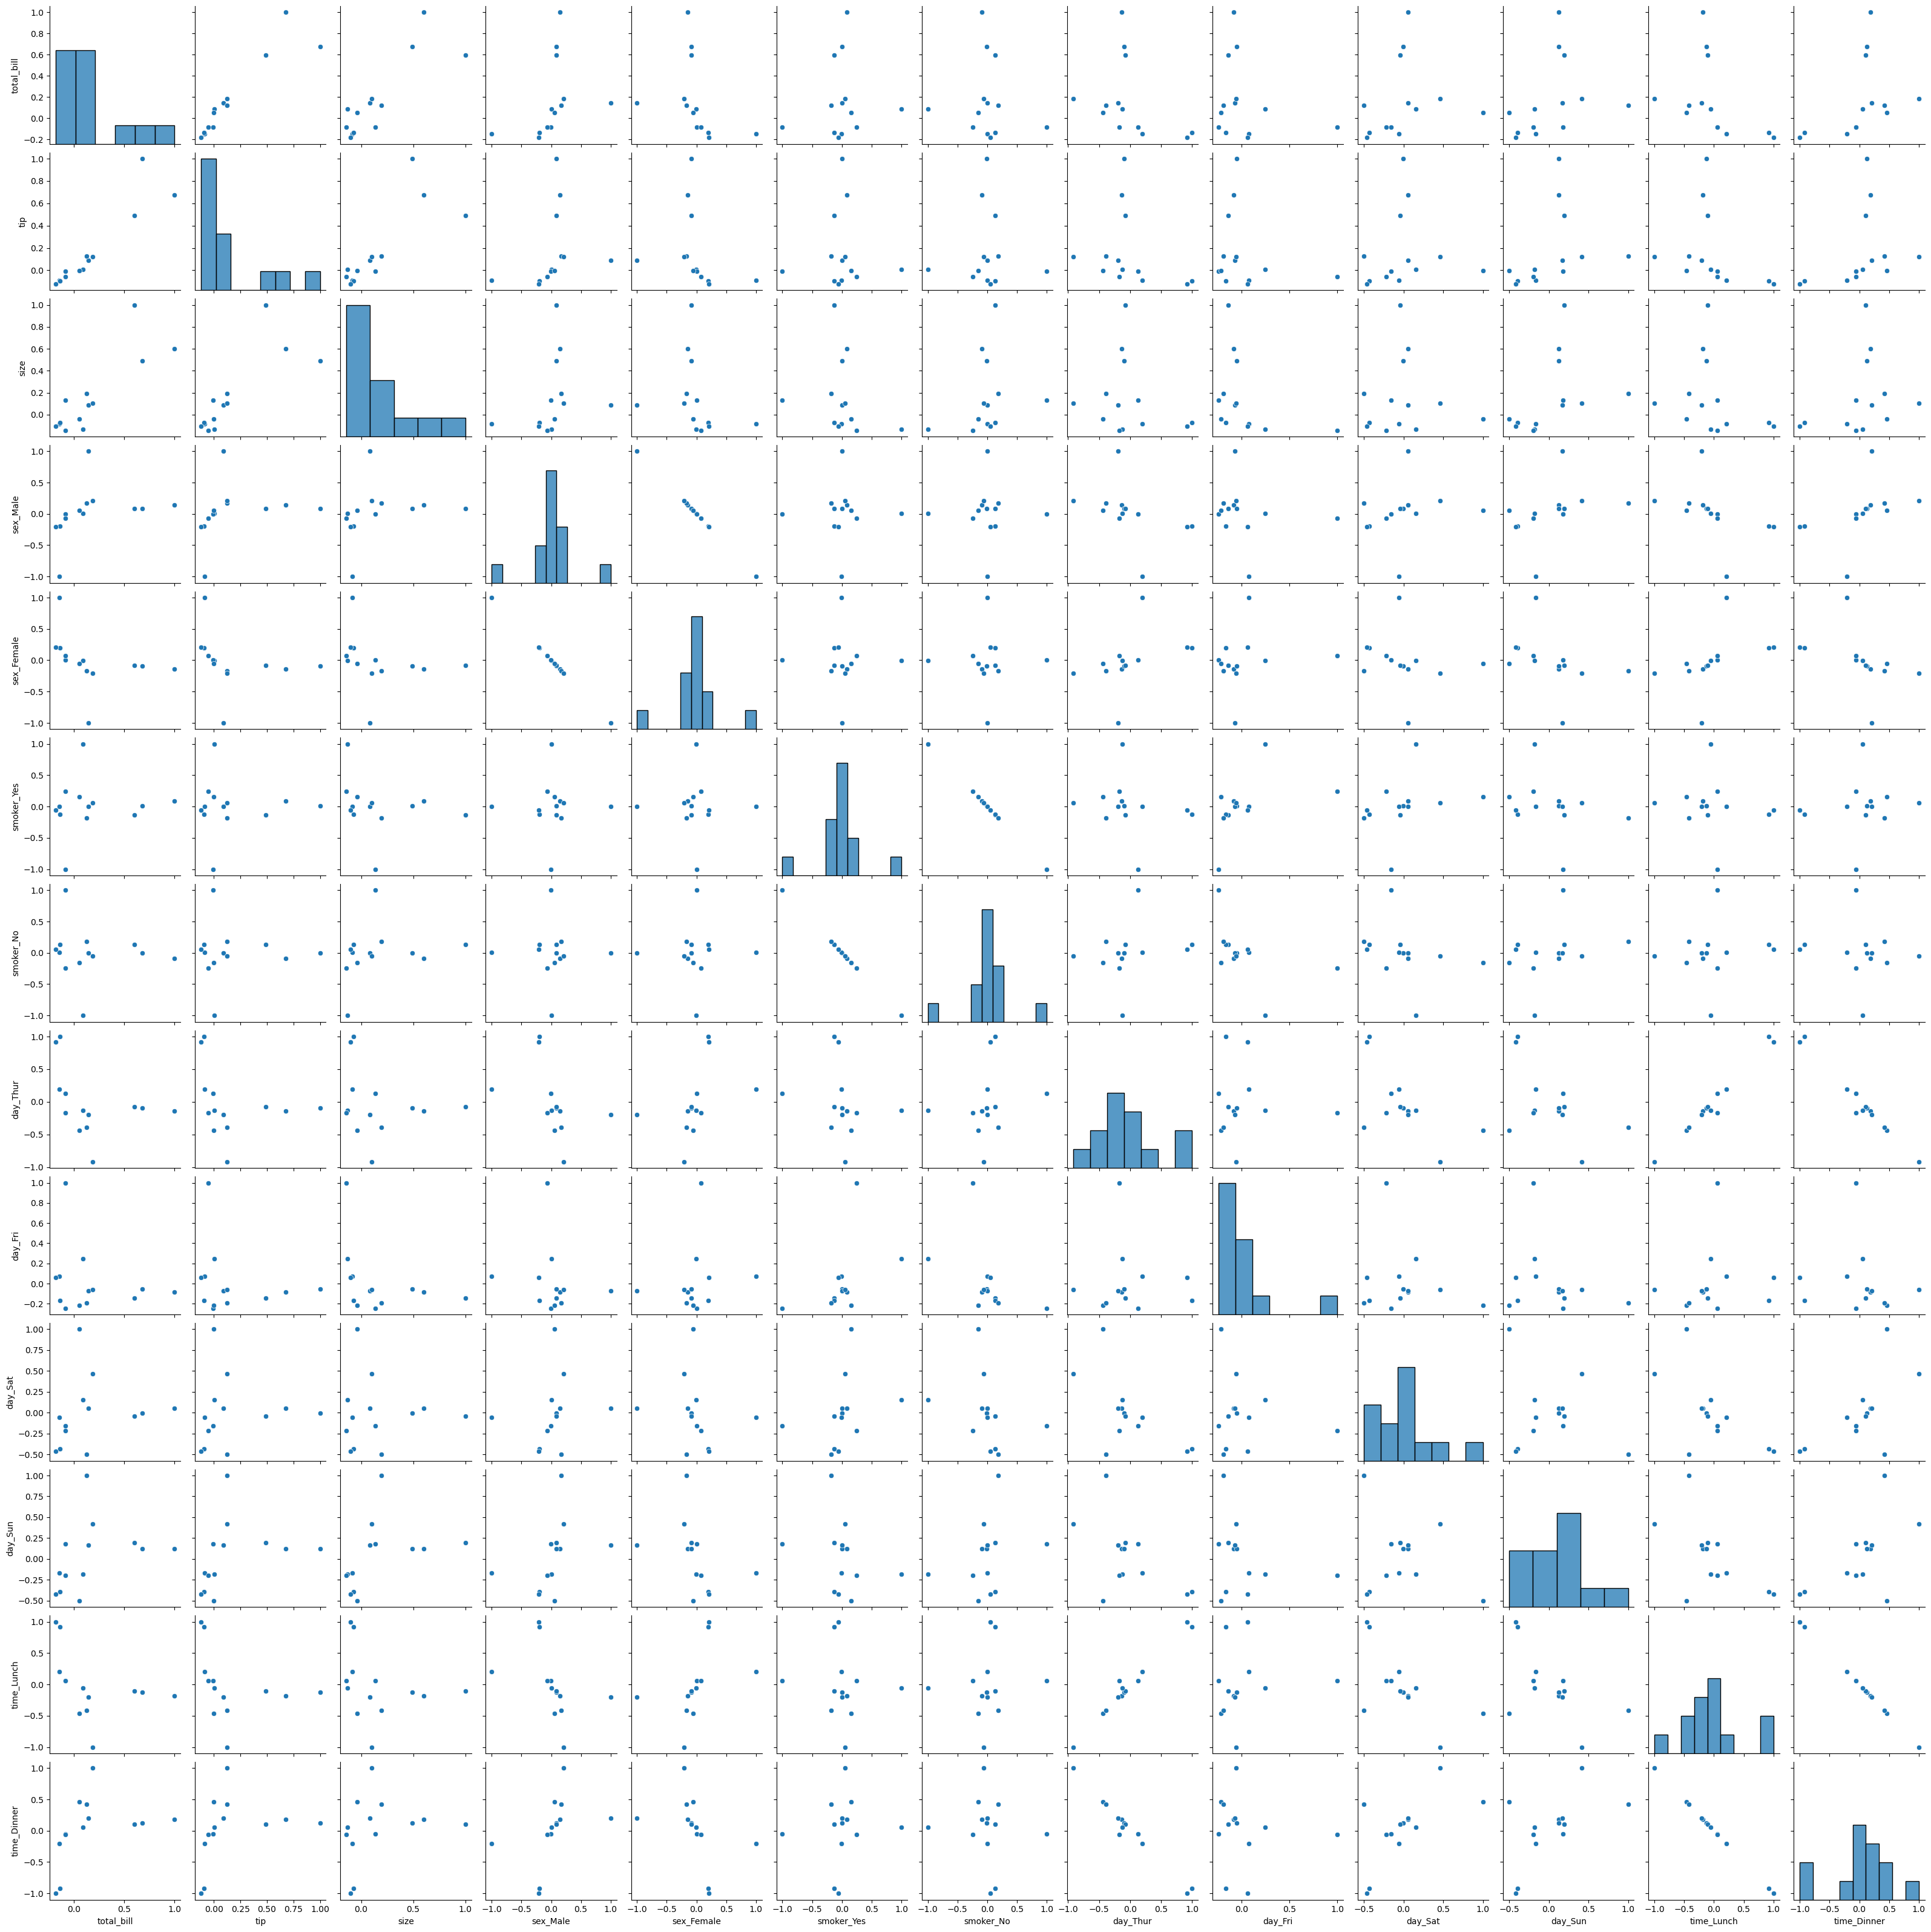

In [46]:
sns.pairplot(correlation_matrix)
plt.show()

C:\Users\udaya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


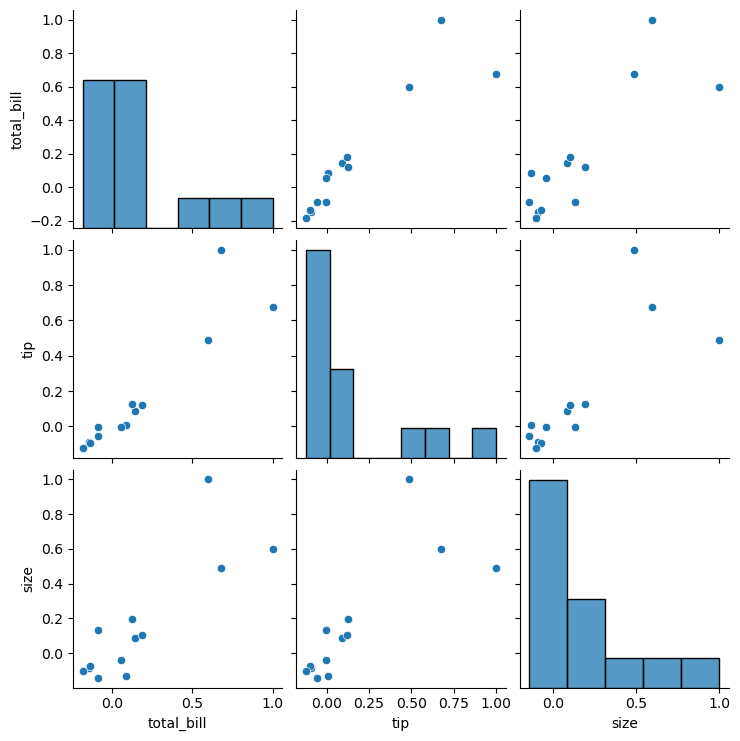

In [47]:
sns.pairplot(correlation_matrix.iloc[:3, :].T)  # Transpose the matrix to have variables as rows
plt.show()